# Clustering

## Importing Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_clust = pd.read_csv("DataClustering.csv")

## a. Pre-Processing and Visualization

Object and data types

In [5]:
display(df_clust)
df_clust.info(verbose=True)

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


All the data types are float64 and they are all no null values

In [22]:
def dispEntryInfo(df): #Function which displays Data type, number of unique entries, number of null entries of each column in a Pandas DataFrame df
    for col in df.columns.values: # For each column
        unique_vals = pd.unique(df[col]) # Creating list of unique values
        print(f"{col}:\t {len(unique_vals)} unique entries.") # Printing data regarding the column: Data type, number of unique values and number of null entries
        if len(unique_vals) <= 10: #If there are <= 10 unique values
            print(f"\tThese are: {unique_vals}\n")

In [23]:
dispEntryInfo(df_clust)

x1:	 351 unique entries.
x2:	 351 unique entries.
x3:	 351 unique entries.
x4:	 351 unique entries.


All the values are unique

### Histograms

In [24]:
def plotAllHist(df):
    for col in df.columns.values: # For each column in dataset
        print(df[col].dtypes)
        plt.hist(df[col])
        plt.xlabel(col)
        plt.show()

float64


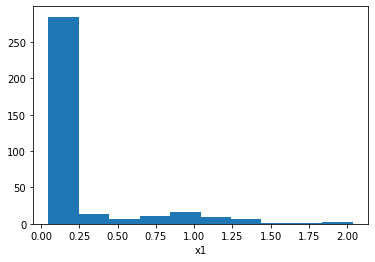

float64


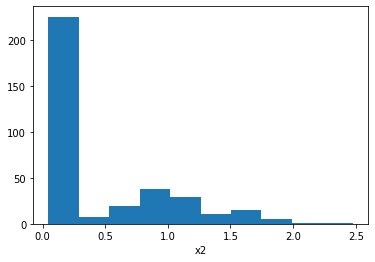

float64


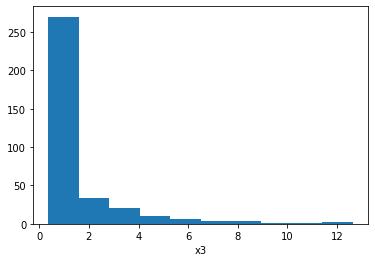

float64


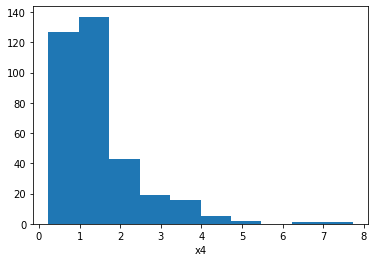

In [25]:
plotAllHist(df_clust)

The dataset seems to be concentrated around 0.<br>
As this data is in 4 dimensions, we will use scatter plots of each pair of dimensions for better visualization.

### Scatter Plots

In [26]:
def plotPairWiseScatter(df_clust):
    for j in range(len(df_clust.columns)):
        for i in range(j+1, len(df_clust.columns)):
            plt.scatter(df_clust[df_clust.columns[j]], df_clust[df_clust.columns[i]])
            plt.xlabel(df_clust.columns[j])
            plt.ylabel(df_clust.columns[i])
            plt.show()

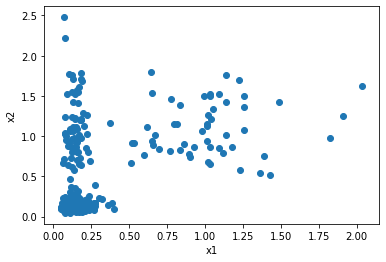

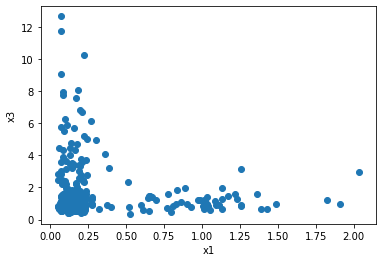

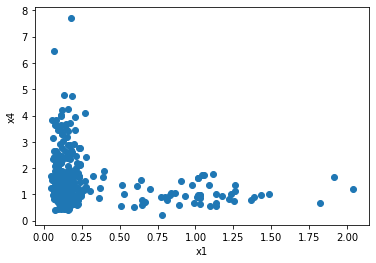

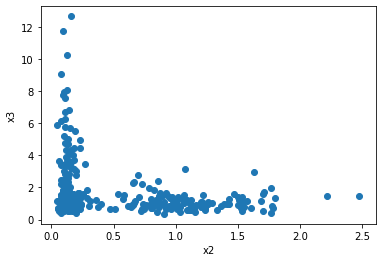

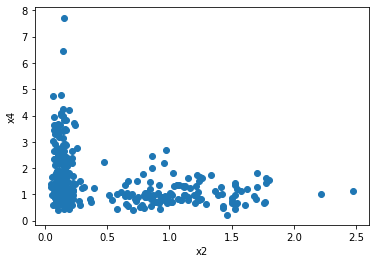

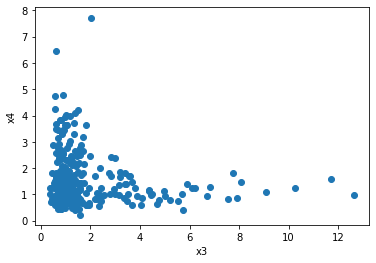

In [27]:
plotPairWiseScatter(df_clust)

The data as expected seems to be clustering near the origin. We can use an exponential transformation.

In [28]:
df_cluste = np.log(df_clust)
display(df_cluste)

,x1,x2,x3,x4
0,-0.183497,0.328892,-0.038506,-0.006349
1,0.228002,0.405790,-0.100796,-0.303764
2,-0.023316,0.056876,0.196825,0.305452
3,0.014262,0.115722,0.178854,-0.015983
4,0.040552,0.198042,-0.145235,0.542804
...,...,...,...,...
346,-1.590240,-1.631050,1.017763,0.602419
347,-1.472374,-2.028641,-0.350615,1.016288
348,-2.344683,-2.230949,-0.054679,1.233906
349,-2.192030,-2.032790,0.094329,0.831038


float64


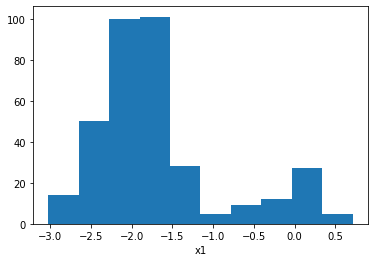

float64


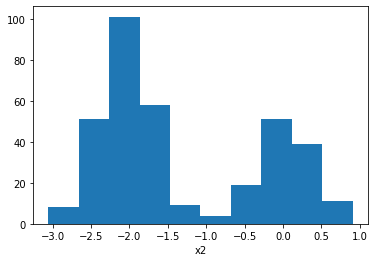

float64


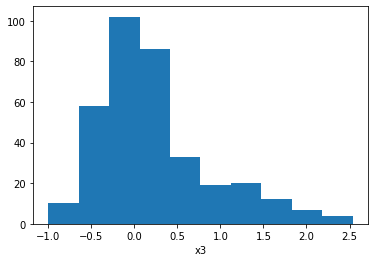

float64


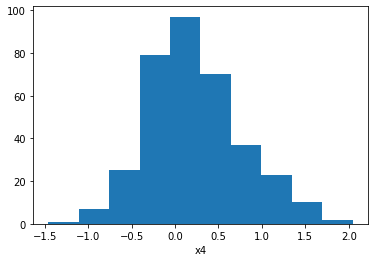

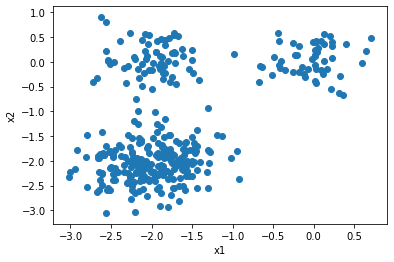

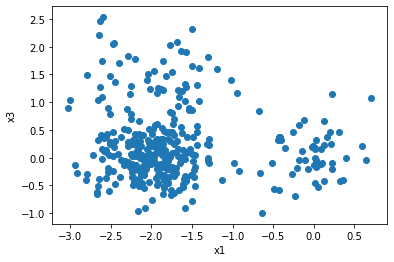

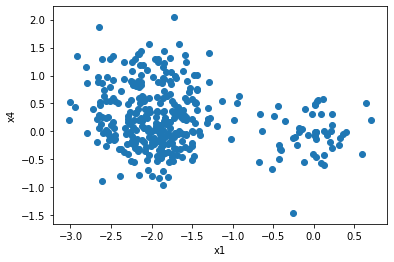

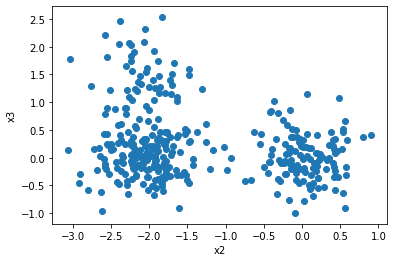

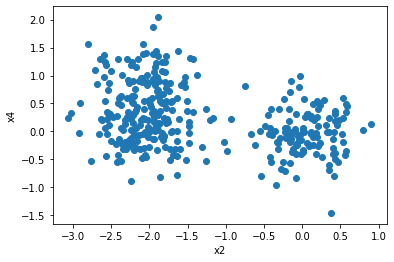

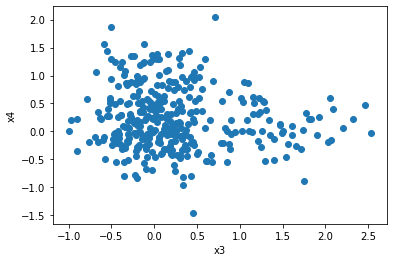

In [29]:
plotAllHist(df_cluste)
plotPairWiseScatter(df_cluste)

## b. K-Means

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [31]:
k_range = np.arange(2,9)
trials_per_k = 5

total_k = k_range.shape[0]
score = np.zeros(total_k)

For 2 clusters, score is 0.9355514375767273
For 3 clusters, score is 0.768645947903403
For 4 clusters, score is 0.8922549477282758
For 5 clusters, score is 0.9960303727287844
For 6 clusters, score is 1.124467574210574
For 7 clusters, score is 1.2558881168668645
For 8 clusters, score is 1.4322901277363864


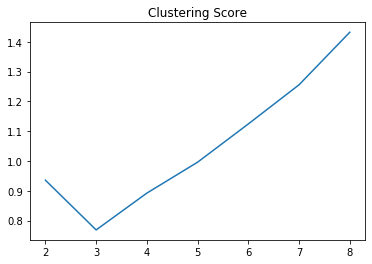

In [32]:
for k_num in range(0,total_k):
    kmeans = KMeans(n_clusters=k_range[k_num])

    trial_score = np.zeros(trials_per_k)

    for trial in range(0,trials_per_k):
        labels = kmeans.fit_predict(df_cluste)
        trial_score[trial] = metrics.davies_bouldin_score(df_cluste, labels)
  
    score[k_num] = np.median(trial_score)
    print(f"For {k_range[k_num]} clusters, score is {score[k_num]}")

plt.plot(k_range,score)
plt.title("Clustering Score")
plt.show()

Lower values indicate better clustering for Davies Bouldin Score, hence k = 3 works best.

In [33]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal)
labels_km_fin = kmeans.fit_predict(df_cluste)

## d. t-SNE Embedding

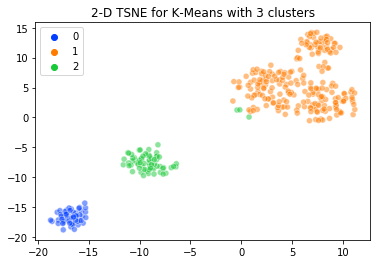

In [34]:
from sklearn.manifold import TSNE

tsne_km = TSNE(n_components=2, perplexity=50)
tsne_km_dims = tsne_km.fit_transform(df_cluste)

sns.scatterplot(x=tsne_km_dims[:,0], y=tsne_km_dims[:,1], alpha=0.5, hue=labels_km_fin, palette="bright")
plt.title(f"2-D TSNE for K-Means with {k_optimal} clusters")
plt.show()